This notebook present the climatologies of SST over global oceans

In [1]:
# load basic library

%config IPCompleter.greedy = True
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import xarray as xr
import senpy as sp

import matplotlib.pyplot as plt
plt.style.use('science')

# load OISSTv2 SST over 1982-2022
sst_ds = sp.OBS_onemodel_sst(model='OISSTv2', time_slice=slice('1982-01', '2022-12'))['sst']

# add cyclic point
sst_ds = sp.add_cyclic_point(sst_ds, dim='lon')

# monthly climatology relative to 1991-2020 and anomalies
sst_m = sst_ds.clim.climatology(clim_slice=slice('1991-01', '2020-12')).load()
sst_a = sst_ds.clim.anomalies(clim_slice=slice('1991-01', '2020-12')).load()

# annual mean climatology
sst_ave_ann = sst_m.mean('month')

# anomlaies standard deviation
sst_std_ann = sst_a.std('time')

# linear trend
sst_trd_ann = sst_ds.trendSig(dim='time', sigmask=False, siglvl=0.05)

## SST climatological annual average

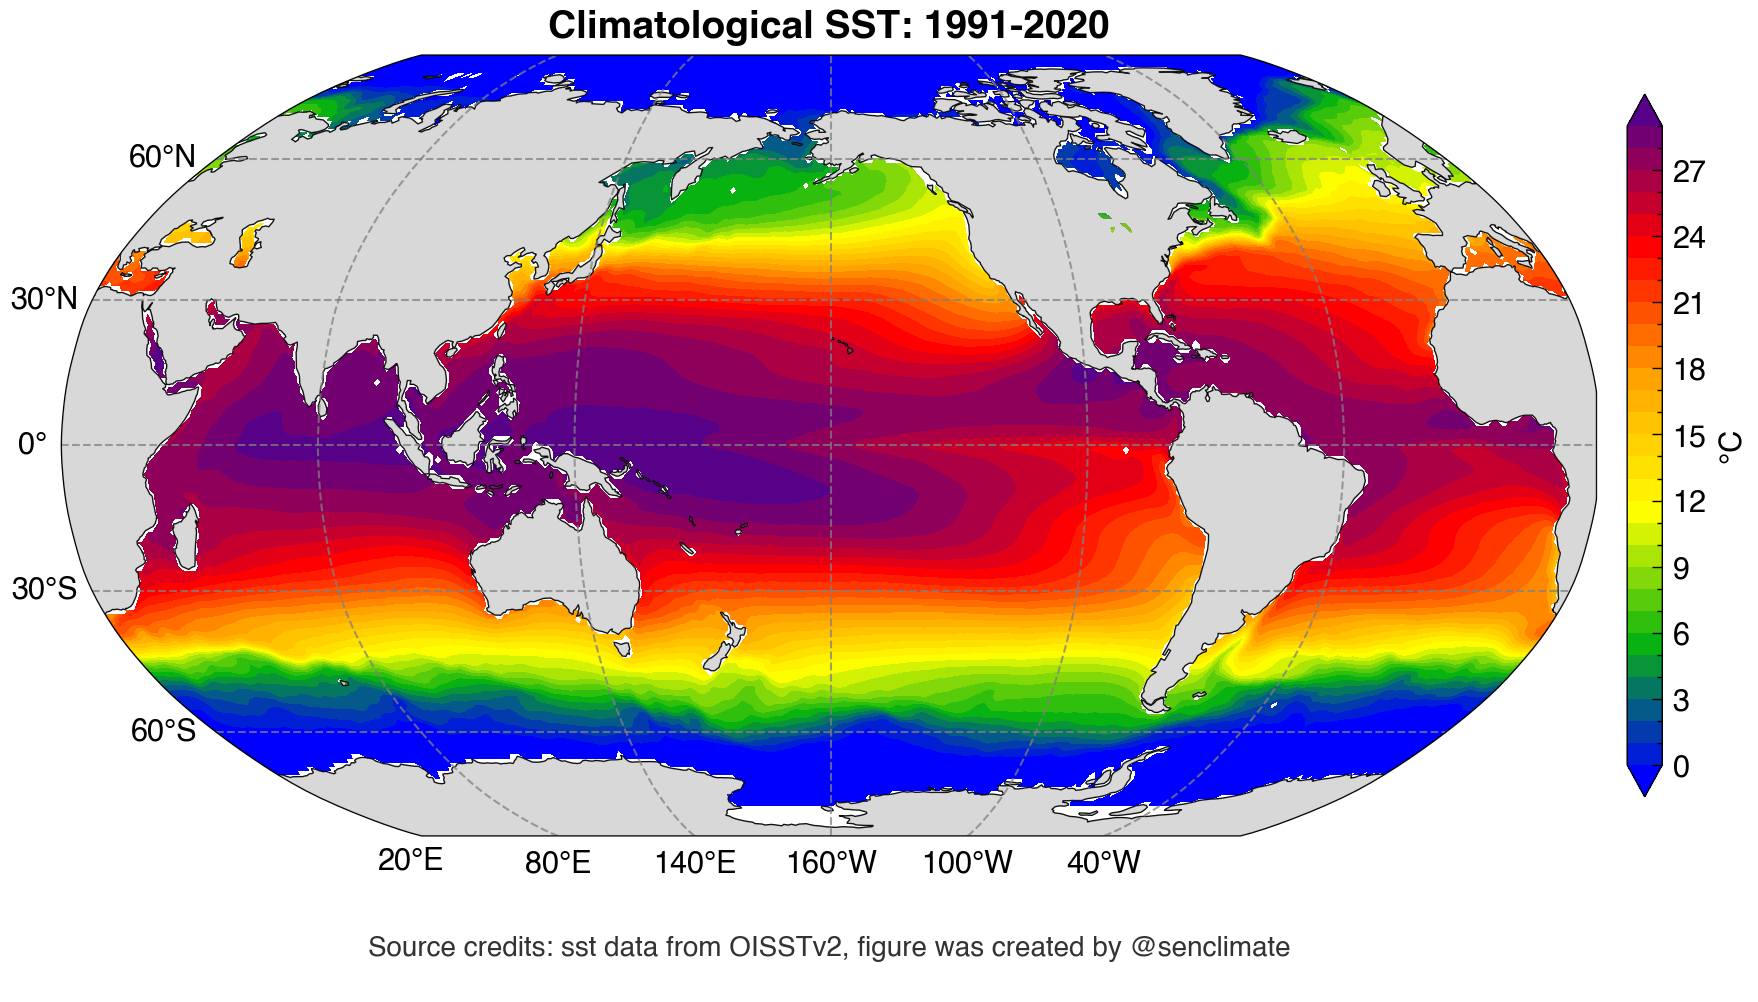

In [2]:
sst_ave_cdict = sp.cmap.dict_cmap_contourf(levels=np.arange(0, 30, step=1), name='BlGrYeOrReVi200', extend='both') 

fig, ax = sp.map_subplots(1, 1, figsize=(10, 5), proj='robin', lon_0=200, aspect=1., layout='compressed')

imag0 = ax.contourf(sst_ave_ann.lon, sst_ave_ann.lat, sst_ave_ann, transform=sp.data_crs, **sst_ave_cdict)
cb = fig.colorbar(imag0, ax=[ax], location='right', shrink=0.9, pad=0.02)
cb.set_label('℃')

sp.map_coastline(ax, color='black')
sp.map_landmask(ax, fc='gray', alpha=0.3)
sp.map_ticks(ax, lon_ticks=np.arange(20, 380, step=60) )
ax.set_title("Climatological SST: 1991-2020", fontsize=14, fontweight='bold')

# Add dataset and map sources
source_text = """
Source credits: sst data from OISSTv2, figure was created by @senclimate
"""
ax.text(0.5, -0.2, source_text, transform=ax.transAxes, 
        fontsize=10, color='black', alpha=0.8, 
        ha='center', va='bottom', zorder=6);

## SST anomalies standard deviation

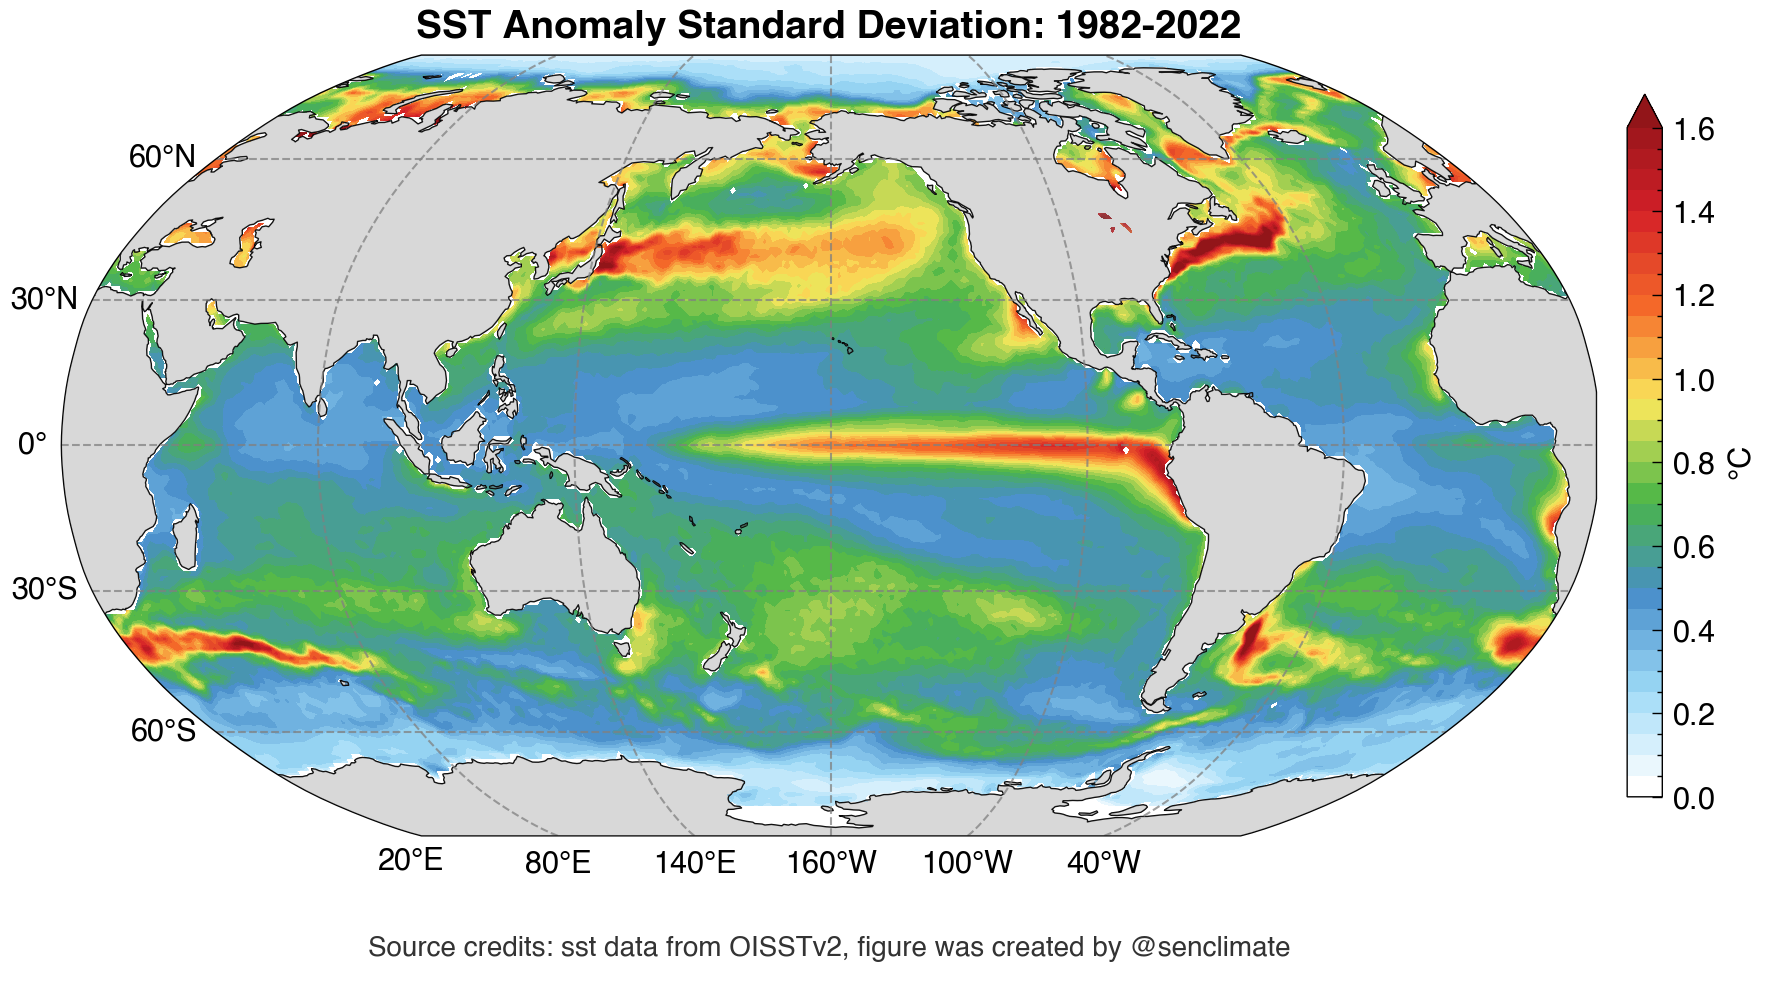

In [3]:
sst_std_cdict = sp.cmap.dict_cmap_contourf(levels=np.arange(0, 1.61, step=0.05), name='WhiteBlueGreenYellowRed', extend='max') 

fig, ax = sp.map_subplots(1, 1, figsize=(10, 5), proj='robin', lon_0=200, aspect=1., layout='compressed')

imag0 = ax.contourf(sst_std_ann.lon, sst_std_ann.lat, sst_std_ann, transform=sp.data_crs, **sst_std_cdict)
cb = fig.colorbar(imag0, ax=[ax], location='right', shrink=0.9, pad=0.02)
cb.set_label('℃')

sp.map_coastline(ax, color='black')
sp.map_landmask(ax, fc='gray', alpha=0.3)
sp.map_ticks(ax, lon_ticks=np.arange(20, 380, step=60) )
ax.set_title("SST Anomaly Standard Deviation: 1982-2022", fontsize=14, fontweight='bold')

# Add dataset and map sources
source_text = """
Source credits: sst data from OISSTv2, figure was created by @senclimate
"""
ax.text(0.5, -0.2, source_text, transform=ax.transAxes, 
        fontsize=10, color='black', alpha=0.8, 
        ha='center', va='bottom', zorder=6);

## SST linear trends

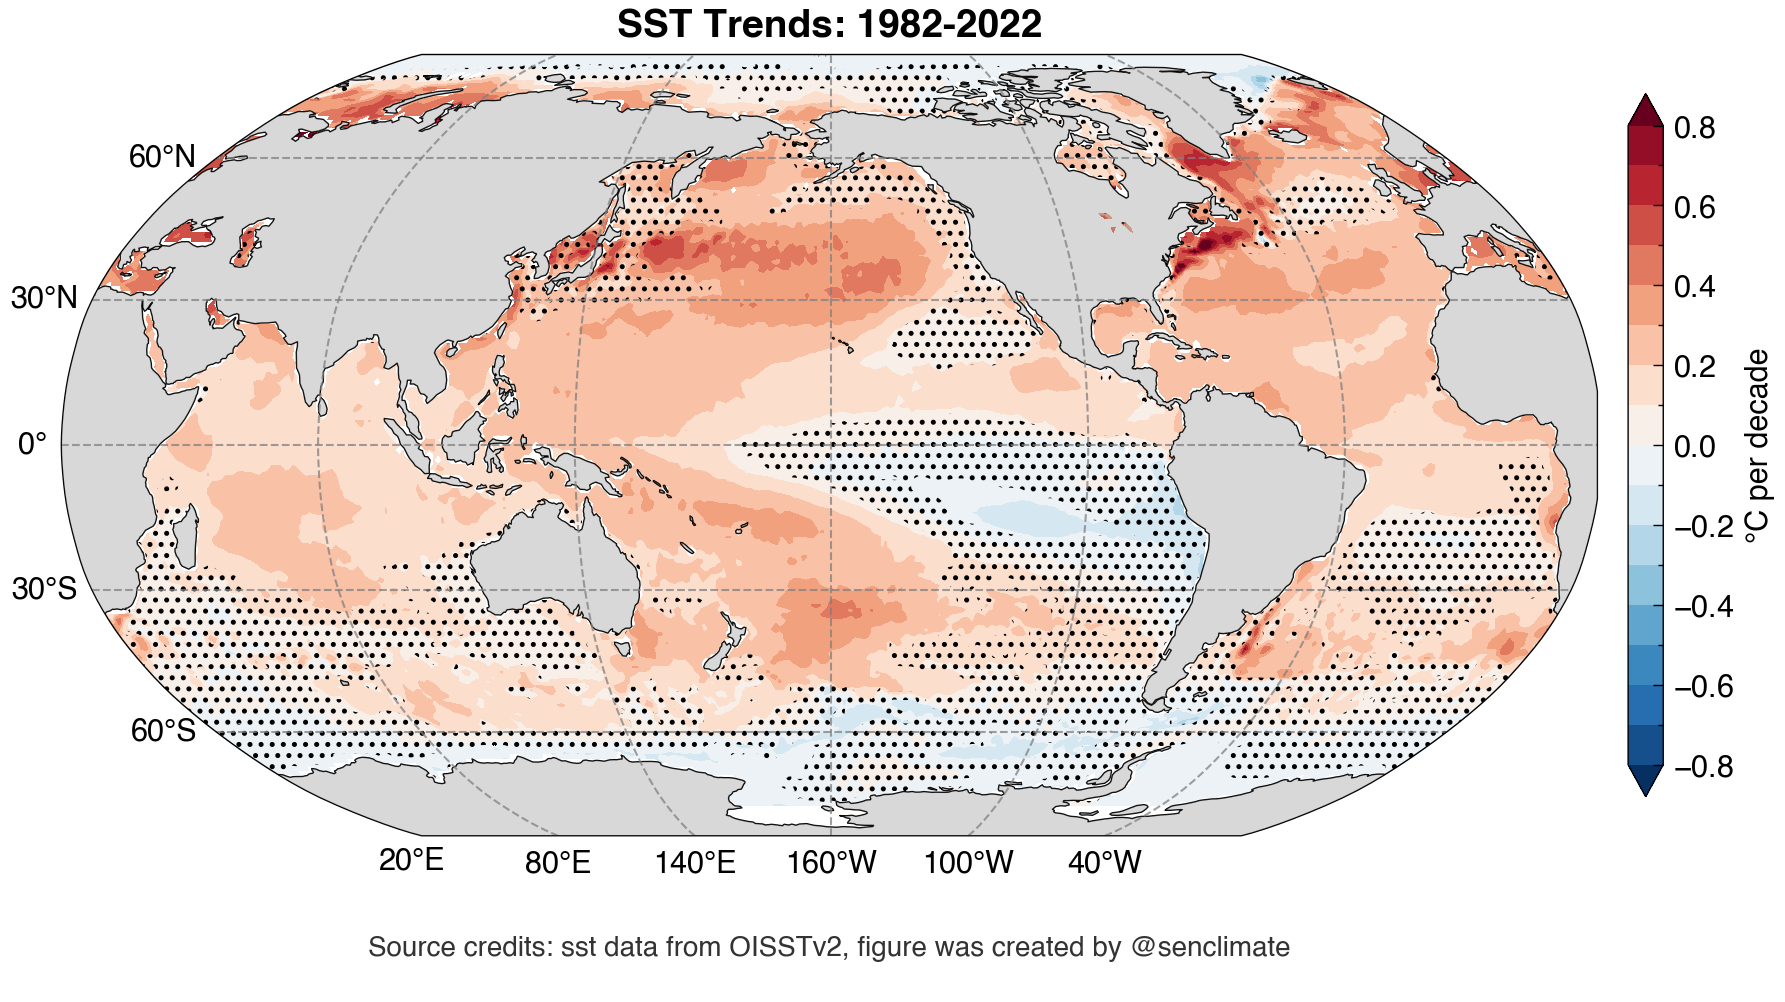

In [4]:
sst_trd_cdict = sp.cmap.dict_cmap_contourf(levels=np.arange(-0.8, 0.81, step=0.1), name='RdBu_r', extend='both')

fig, ax = sp.map_subplots(1, 1, figsize=(10, 5), proj='robin', lon_0=200, aspect=1., layout='compressed')

imag0 = ax.contourf(sst_trd_ann.lon, sst_trd_ann.lat, sst_trd_ann['s']*120, transform=sp.data_crs, **sst_trd_cdict)
cb = fig.colorbar(imag0, ax=[ax], location='right', shrink=0.9, pad=0.02)
cb.set_label('℃ per decade')

CS = ax.contourf(sst_trd_ann.lon, sst_trd_ann.lat, sst_trd_ann['p'], transform=sp.data_crs, levels=[0, 0.05, 1], hatches=["", "..."], alpha=0)


sp.map_coastline(ax, color='black')
sp.map_landmask(ax, fc='gray', alpha=0.3)
sp.map_ticks(ax, lon_ticks=np.arange(20, 380, step=60) )
ax.set_title("SST Trends: 1982-2022", fontsize=14, fontweight='bold')

# Add dataset and map sources
source_text = """
Source credits: sst data from OISSTv2, figure was created by @senclimate
"""
ax.text(0.5, -0.2, source_text, transform=ax.transAxes, 
        fontsize=10, color='black', alpha=0.8, 
        ha='center', va='bottom', zorder=6);